# Networkx

## 基本操作

In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()

In [ ]:
G.add_node(1)
G.add_node("Tokyo")
G.add_node(5,demand=500)
G.add_node(6,product=["A","F","D"])

In [ ]:
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,3,weight=7,capacity=15.0)
G.add_edge(1,4,cost=1000)

In [ ]:
print(G[2][3]) # 枝(2,3)の情報を表示

{'weight': 7, 'capacity': 15.0}


In [ ]:
for n in G.nodes():
  print("node:",n)

node: 1
node: Tokyo
node: 5
node: 6
node: 2
node: 3
node: 4


In [ ]:
for e in G.edges():
  print("edge:",e)

edge: (1, 2)
edge: (1, 3)
edge: (1, 4)
edge: (2, 3)


In [ ]:
G = nx.DiGraph()
G.add_edges_from([(1,2),(1,3),(2,3),(2,4),(3,4),(3,5),(4,3),(4,6),(5,6)])
print(G.degree(4),G.in_degree(4),G.out_degree(4))

4 2 2


## 課題A
英語のじゃんけんでは「rock」は「ぐー」, 「paper」は「ぱー」,「scissors」は「ちょき」 を表します．rock, paper, scissorsを点集合とする有向グラフを作ってください．
ただし，各2点間において弱い点から強い点への有向枝を持つものとします．

In [ ]:
import networkx as nx

G = nx.DiGraph()

G.add_nodes_from(["rock", "paper", "scissors"])

G.add_edge("rock", "paper", relation="beats")
G.add_edge("paper", "scissors", relation="beats")
G.add_edge("scissors", "rock", relation="beats")

## グラフの描画

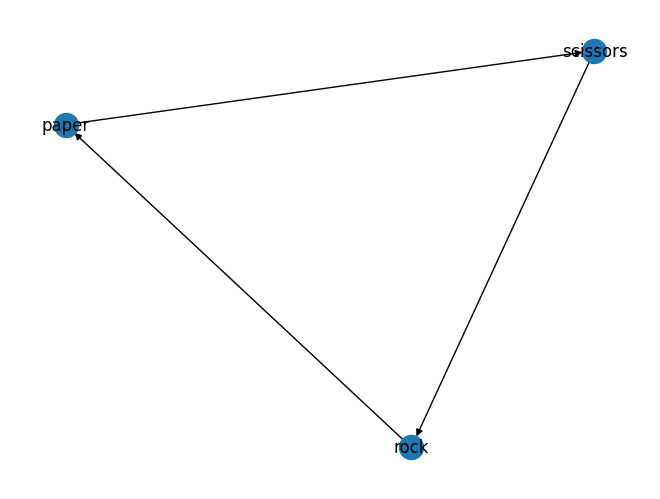

In [ ]:
import matplotlib.pyplot as plt
nx.draw(G,with_labels=True)

## 例

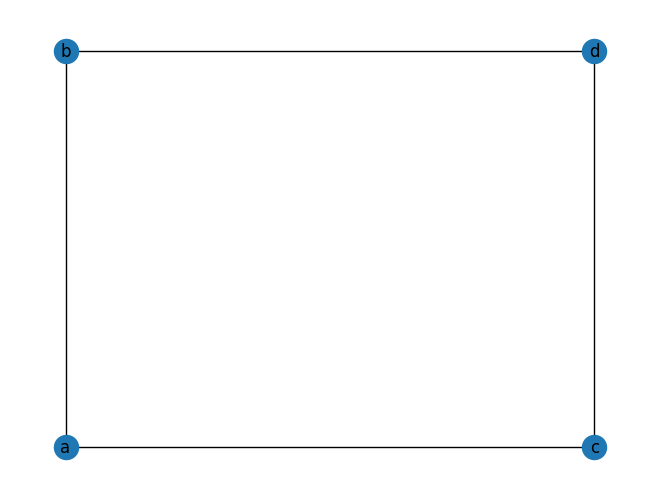

In [ ]:
G = nx.Graph()
points = {"a":(0,0),"b":(0,1),"c":(1,0),"d":(1,1)}

for n in points:
  G.add_node(n)

G.add_edge("a","b")
G.add_edge("c","d")
G.add_edge("a","c")
G.add_edge("b","d")

nx.draw(G,pos=points,with_labels=True)

## 課題B
以下の点aから点fの6点からなるグラフGに対して，枝を追加して数字の「5」を作ってください．

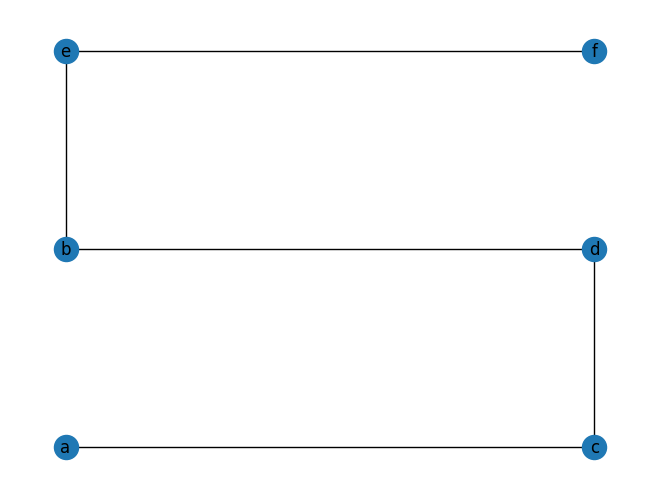

In [ ]:
G = nx.Graph()
points = {"a":(0,0),"b":(0,1),"c":(1,0),"d":(1,1),"e":(0,2),"f":(1,2)}

for n in points:
  G.add_node(n)

G.add_edge("e","f")
G.add_edge("e","b")
G.add_edge("b","d")
G.add_edge("d","c")
G.add_edge("a","c")


nx.draw(G,pos=points,with_labels=True)

## 最小木

In [ ]:
G = nx.Graph()
G.add_edge('Arigator','WhiteBear',weight= 2)
G.add_edge('Arigator','Bull',weight= 1)
G.add_edge('Bull','WhiteBear',weight= 1)
G.add_edge('Bull','Shark', weight= 3)
G.add_edge('WhiteBear','Condor',weight= 3)
G.add_edge('WhiteBear','Shark',weight= 5)
G.add_edge('Shark','Condor',weight= 4)

T= nx.minimum_spanning_tree(G)

print(T.edges())
print(T.size(weight="weight"))

[('Arigator', 'Bull'), ('WhiteBear', 'Bull'), ('WhiteBear', 'Condor'), ('Bull', 'Shark')]
8.0


weight of T: 2095.17
edge num of T: 999


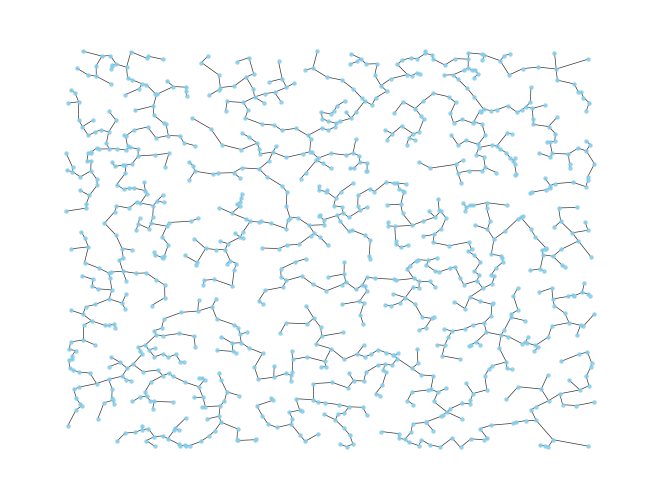

In [ ]:
import networkx as nx
import random
import math

num_nodes = 1000
G = nx.Graph()

# {node_id: (x, y)}
node_positions = {}

for i in range(num_nodes):
    x = random.uniform(0, 100)
    y = random.uniform(0, 100)
    G.add_node(i)
    node_positions[i] = (x, y)

for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        pos_i = node_positions[i]
        pos_j = node_positions[j]
        distance = math.sqrt((pos_i[0] - pos_j[0])**2 + (pos_i[1] - pos_j[1])**2)
        G.add_edge(i, j, weight=distance)

T = nx.minimum_spanning_tree(G, weight='weight')

nx.draw(
    T,
    pos=node_positions,
    with_labels=False,
    node_size=5,
    node_color='skyblue',
    edge_color='black',
    width=0.5,
    alpha=0.8,
)

print(f"weight of T: {T.size(weight='weight'):.2f}")
print(f"edge num of T: {T.number_of_edges()}")